## <span style="font-family:serif"> Abstract </span>

> <span style="font-family:serif"> Crunchyroll is a streaming platform that offers anime, manga, and Asian dramas to users worldwide. A dataset was found on Kaggle, a platform for users to access and download public datasets, that contained information pertaining to anime found in the streaming service including user ratings and genre information. Because Cruncyroll has over 1000 anime titles to offer to a user base of more than 100 million registered users, the data generated by the streaming service is immense and provides valuable insights into the preferences and behaviors of anime fans.
</span>

> <span style="font-family:serif"> The main aim of this project is to analyze the data using visualization tools to identify any possible patterns that can be found in Crunchyroll from 2020. The analysis would involve examining user ratings, the weight of the votes, and genre information for different anime. The results of this analysis can be used by Crunchyroll to improve user experience, personalize recommendations, and inform content creation decisions. </span>

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
%matplotlib inline

### read_csv is a pandas method that allows us to read a comma-seperated value (csv) file
anime_data = pd.read_csv(r'anime.csv')

In [2]:
genres = [] ### initialize an emtpy array
substring = "genre" ### create a substring "genre"

for col in anime_data.columns: ### for each column in the dataframe
    if substring in col:       ### check if "genre" is in the name of the column
        genres.append(col)     ### add that column name to the array

In [3]:
### create a DataFrame that contains contains information related to the genre

### initialize empty genre_count and genre_mean lists 
genre_count = []
genre_mean = []

### for each genre 
for genre in genres:
    ### list how many anime are classified as that genre
    genre_count.append(anime_data.loc[anime_data[genre] == 1, genre].sum())
    
    ### list how many anime are classified as that genre
    genre_mean.append(anime_data.loc[anime_data[genre] == 1, 'rate'].mean())

### create a DataFrame using the produced lists
### transpose the initial dataframe because it produced 3 rows instead of 3 columns
### rename the columns for readability
### sort the DataFrame by descending order of average ratings
genre_info = pd.DataFrame([genres, genre_mean, genre_count]).transpose().rename(columns = { 0:'genre', 1:'mean_rating', 2:'count' }).sort_values(by=['mean_rating'], ascending = False)

# show the first 5 results of the DataFrame
genre_info.head(5)

,genre,mean_rating,count
12,genre_jdrama,4.77,3.0
6,genre_food,4.7,1.0
9,genre_horror,4.63,1.0
26,genre_sports,4.394483,58.0
21,genre_seinen,4.281313,99.0


Text(0.02, 0.5, 'Frequency')

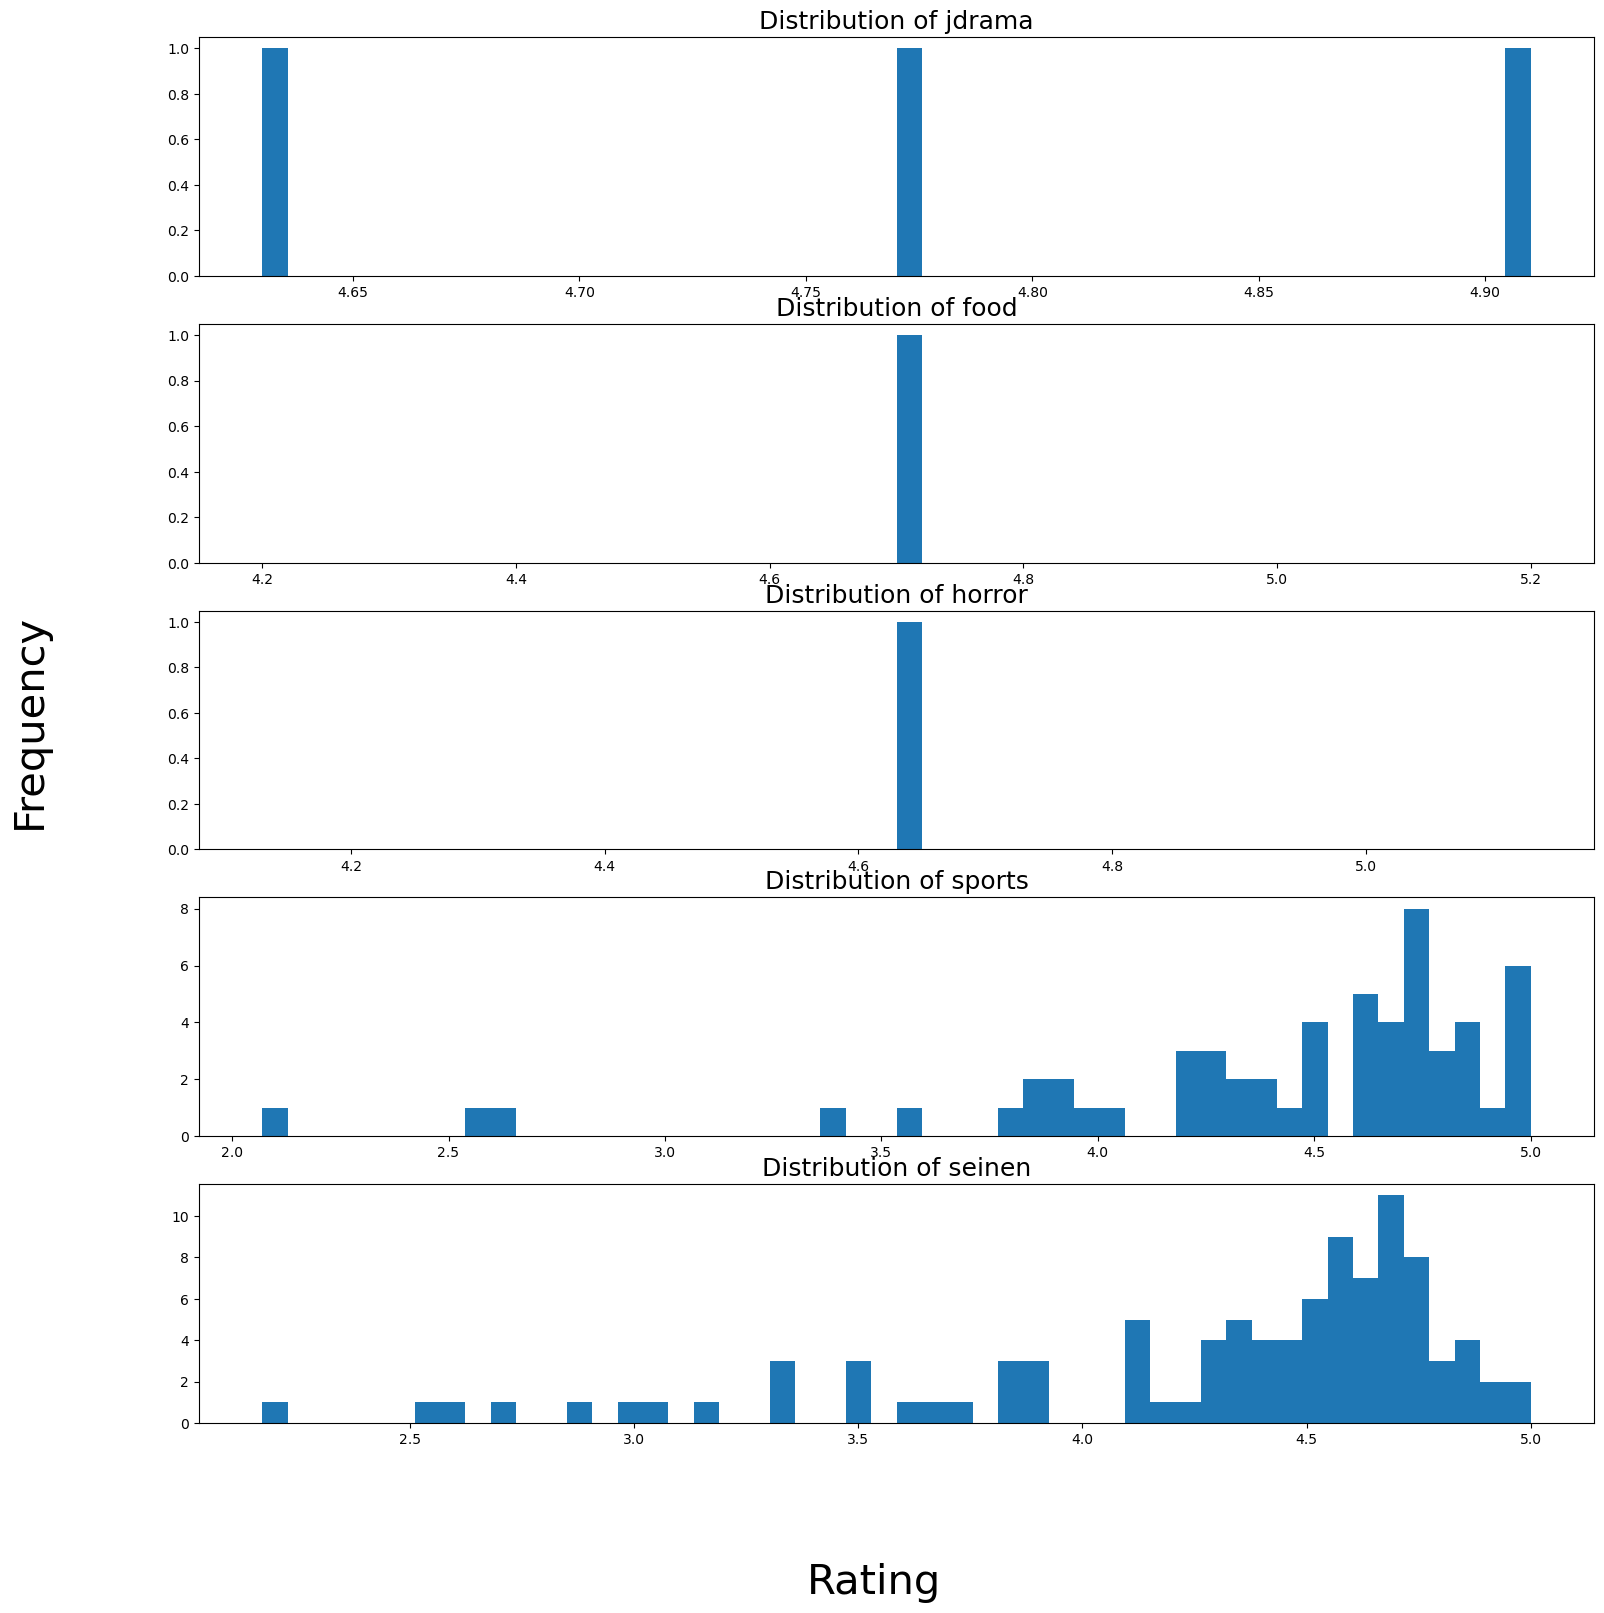

In [9]:
index = [12, 6, 9, 26, 21]

fig = plt.figure(figsize = (18,18))

for i in range(5):
    idx = index[i]
    genre = genres[idx]
    string = genre.replace('genre_','')
    plt.subplot(5,1,i+1)
    plt.hist(anime_data.loc[anime_data[genre] == 1, 'rate'], bins = 50)
    plt.title(f"Distribution of {string}", fontsize = 18)

fig.supxlabel("Rating", fontsize = 30)
fig.supylabel("Frequency", fontsize = 30)
    

In [5]:
index = [12, 6, 9, 26, 21]

# for each top genre
for idx in index:
    # list the average rating of anime classified as that genre
    print("mean of "+ genres[idx] + ": " + str(anime_data.loc[anime_data[genres[idx]] == 1, 'rate'].mean()))

mean of genre_jdrama: 4.77
mean of genre_food: 4.7
mean of genre_horror: 4.63
mean of genre_sports: 4.39448275862069
mean of genre_seinen: 4.281313131313132


# Notes for Analysis

- the top 5 anime genre from highest average rating to lowest average rating Jdrama, Food, Horror, Sports, and Seinen.
- jdrama avg = 4.77, and there were only 3 classified as jdrama
- food avg = 4.7, there was only 1 classified as food
- horror avg = 4.63, there was only 1 classified as horror
- sports avg = 4.39, there were 58 classified as sports
- seinen avg = 4.28, there were 99 classified as seinen

- this would indicate that the data is either skewed or incomplete
- i would likely need to manually restore the data for a more accurate analysis

# Notes After Analysis



- One more thing to note is that the data from this dataset was crawled and posted on Kaggle in 2020. This Crunchyroll data is very likely to not be up-to-date and may or may not representative of current Crunchyroll information if more reviews and ratings were added to various anime in the dataset.

- Year the anime started.
- Manga vs Animated Show.
- Rating.
- Dataset was from 2020, may be outdated compared to data currently.

- Take note of anime I am interested in, perhaps what studios that animated those series, and/or the year they were made.

- It's a little difficult to determine what is what from this database. Some could be anime series, others could be manga, some could be live actions, and some might be shows that aren't animated at all and are vaguely related to anime like podcasts, or projects that take inspiration from anime. A next step for this project would likely be to better organize the data and/or to curate the dataset to contain more comprehensive information.






In [6]:
####
#### The data is incomplete/inaccurate some anime do not have listed genre, so we must correct the data manually to be more complete
####

no_genre = [] ### initialize an empty list for anime that do not have any genre information

for anime in anime_data['anime']: # for each anime in the data frame
    
    genre_count = 0 ### a temporary variable
    for genre in genres: ### check each genre in the "genres" array
        
        ### check each genre column and check if the anime is of said genre
        if anime_data.loc[anime_data['anime'] == anime][genre].sum() == True:      
            genre_count += 1 
            break
    
    ### if there is no genre information append to "no_genre" list
    if genre_count == 0:
        no_genre.append(anime)
            
no_genre    

['Naruto Shippuuden',
 'Shugo Chara',
 'BLEACH',
 'Naruto',
 'REBORN!',
 'Gintama',
 'Hayate the Combat Butler! (S1 e S2)',
 'Blue Exorcist',
 'Durarara!!',
 'Time of Eve',
 'Linebarrels of Iron',
 'Hunter x Hunter',
 'Inu X Boku Secret Service',
 'A Dark Rabbit has Seven Lives',
 'Fate/Zero',
 "JoJo's Bizarre Adventure",
 'Chihayafuru',
 'RWBY',
 'Gankutsuou',
 'Fairy Tail',
 'Level E',
 'Rio Rainbow Gate',
 'Horizon in the Middle of Nowhere',
 'Kids on the Slope',
 'NARUTO Spin-Off: Rock Lee & His Ninja Pals',
 'Galaxy Express 999',
 "Leiji Matsumoto's OZMA",
 'Do You Love Your Mom and Her Two-Hit Multi-Target Attacks?',
 'Os Cavaleiros do Zodíaco - Ômega',
 'Phi Brain',
 'SHIROBAKO',
 'Digimon Xros Wars - The Young Hunters Who Leapt Through Time',
 'La storia della Arcana Famiglia',
 'Death Note (Drama)',
 'Mischievous Kiss - Love in Tokyo',
 'Kaiji',
 'Sakura Quest',
 'makuranodanshi',
 "The Ryuo's Work is Never Done!",
 'Tokyo Ghoul: re',
 'Anifile',
 'gdgd Fairies',
 'Cuticle Det

This block of code goes through the data, to check whether or not there is genre information for all of the shows listed. To clean the data, I would remove the shows that have no information on genre because it would be hard to conduct analyses. However, from my prior knowledge of anime, I was shocked to find that popoular shows like "Naruto", "BLEACH", and Shugo Chara did not have any genre information. Rather than simply removing possibly impactful data points, I am researching various resources to try fix these gaps in data. So far MyAnimeList.net has played a large role in restoring the data.

By running this code, I am providing myself with a reference list of the anime data that needs to be cleaned. Part of this process requires me to research the anime and its genre and manually enter the appropriate information into the csv file. Although it is true that I would need to either fill the missing genre information or remove it, it is also very likely that I would need to go through all of the data to verify that the genre information is accurate.

In [7]:
anime_data

,anime,anime_url,anime_img,episodes,votes,weight,rate,rate_1,rate_2,rate_3,...,genre_romance,genre_sci_fi,genre_seinen,genre_sgdrama,genre_shojo,genre_shonen,genre_slice of life,genre_sports,genre_supernatural,genre_thriller
0,Naruto Shippuuden,https://www.crunchyroll.com/naruto-shippuden,https://img1.ak.crunchyroll.com/i/spire4/1c1df...,500,48518,233346,4.81,1111,275,817,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Shugo Chara,https://www.crunchyroll.com/shugo-chara,https://img1.ak.crunchyroll.com/i/spire1/7c0c0...,51,33688,163641,4.86,503,104,438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BLEACH,https://www.crunchyroll.com/bleach,https://img1.ak.crunchyroll.com/i/spire2/52edb...,366,23900,115445,4.83,391,98,370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Naruto,https://www.crunchyroll.com/naruto,https://img1.ak.crunchyroll.com/i/spire2/01453...,220,16613,79667,4.80,456,64,282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Skip Beat!,https://www.crunchyroll.com/skip-beat,https://img1.ak.crunchyroll.com/i/spire3/4bbe3...,0,15011,73683,4.91,98,20,112,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,Space Warrior Baldios,https://www.crunchyroll.com/space-warrior-baldios,https://img1.ak.crunchyroll.com/i/spire4/e6897...,0,0,0,0.00,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1251,Captain Harlock: Arcadia of my Youth,https://www.crunchyroll.com/captain-harlock-ar...,https://img1.ak.crunchyroll.com/i/spire1/fc4f9...,0,0,0,0.00,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1252,Osomatsu-kun,https://www.crunchyroll.com/osomatsu-kun,https://img1.ak.crunchyroll.com/i/spire4/b0778...,0,0,0,0.00,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1253,Magic User's Club OVA,https://www.crunchyroll.com/magic-users-club-ova,https://img1.ak.crunchyroll.com/i/spire4/3371b...,0,0,0,0.00,0,0,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


(array([ 9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  2.,  3.,  4.,  3.,  5.,
         4.,  9.,  5.,  3., 12.,  8.,  8., 14.,  9., 16., 16., 15.,  9.,
        11., 26., 19., 29., 17., 20., 29., 34., 34., 16., 23.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
 <BarContainer object of 50 artists>)

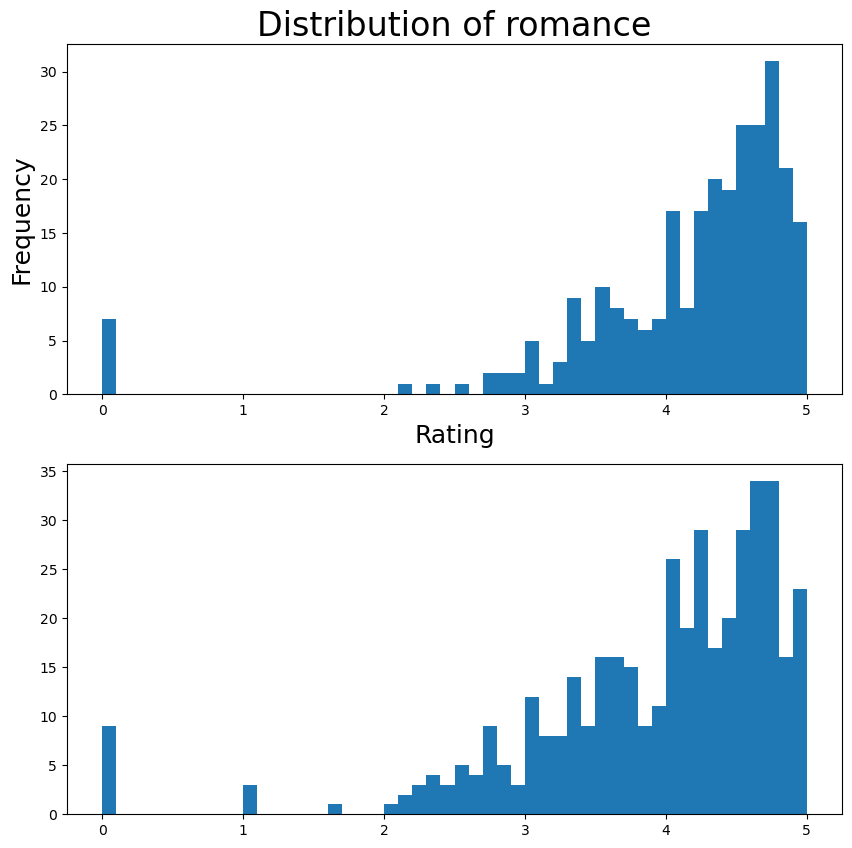

In [8]:
plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
plt.hist(anime_data.loc[anime_data['genre_romance'] == 1, 'rate'], bins = 50)
plt.xlabel("Rating", fontsize = 18)
plt.ylabel("Frequency", fontsize = 18)
plt.title("Distribution of romance", fontsize = 24)
plt.subplot(2,1,2)
plt.hist(anime_data.loc[anime_data['genre_action'] == 1, 'rate'], bins = 50)